In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


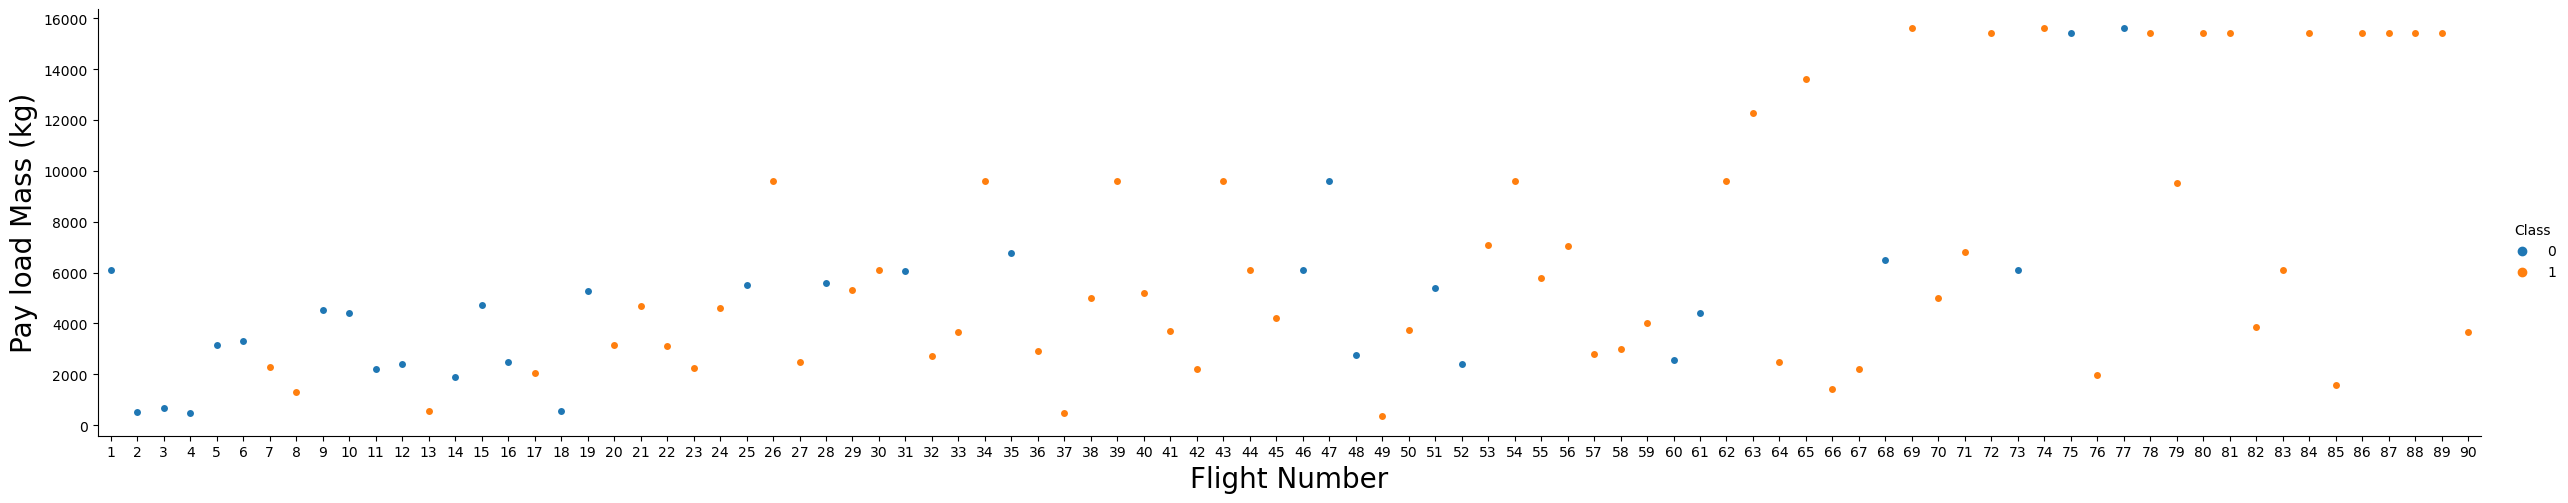

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


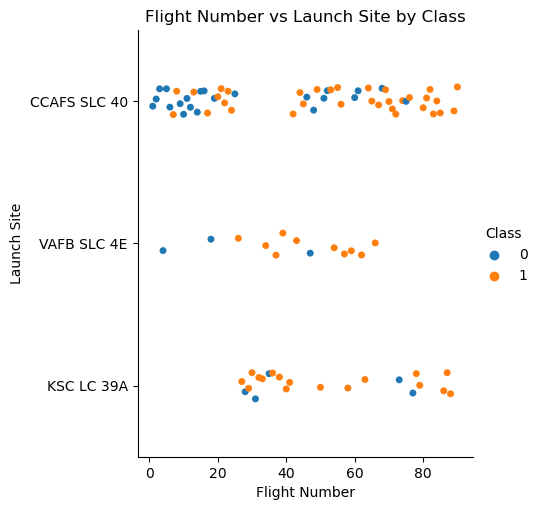

In [5]:
# Create the plot
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, kind="strip", jitter=True)

# Set plot labels and title
plt.title('Flight Number vs Launch Site by Class')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')

# Show the plot
plt.show()

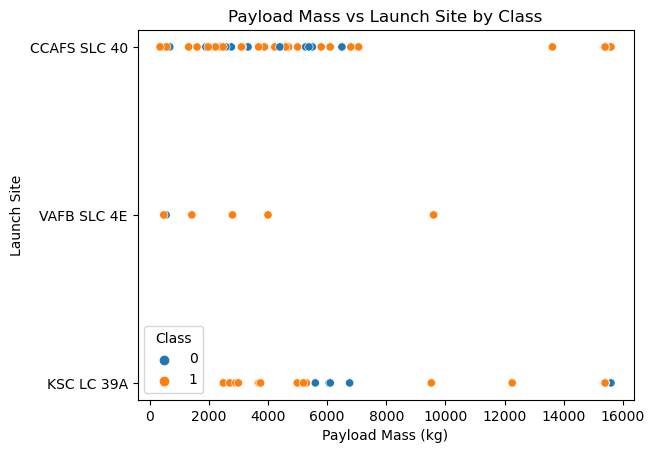

In [6]:
# Create the plot
sns.scatterplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df)

# Set plot labels and title
plt.title('Payload Mass vs Launch Site by Class')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')

# Show the plot
plt.show()

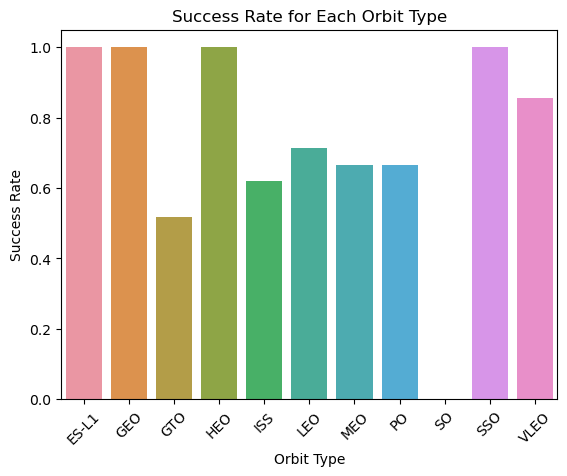

In [8]:
# Calculate success rate for each orbit type
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Create the bar plot
sns.barplot(x="Orbit", y="Class", data=orbit_success_rate)

# Set plot labels and title
plt.title('Success Rate for Each Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

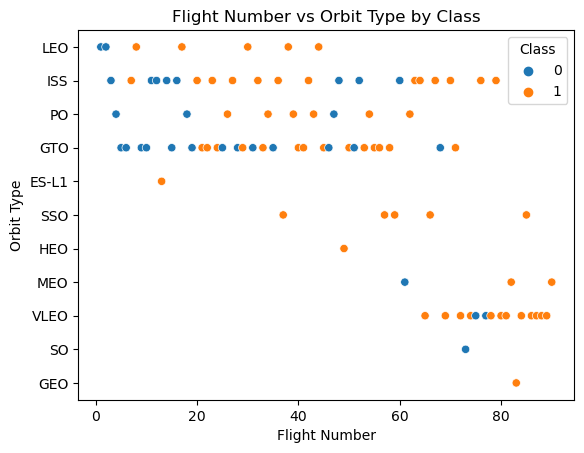

In [9]:
# Create the scatter plot
sns.scatterplot(x="FlightNumber", y="Orbit", hue="Class", data=df)

# Set plot labels and title
plt.title('Flight Number vs Orbit Type by Class')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')

# Show the plot
plt.show()

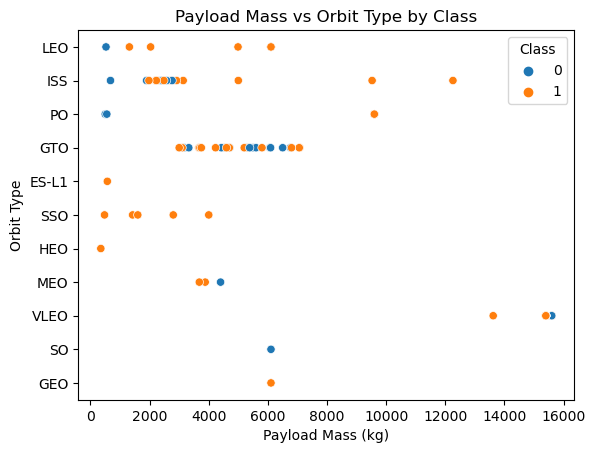

In [10]:
# Create the scatter plot
sns.scatterplot(x="PayloadMass", y="Orbit", hue="Class", data=df)

# Set plot labels and title
plt.title('Payload Mass vs Orbit Type by Class')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')

# Show the plot
plt.show()

In [11]:
# A function to Extract years from the date
def Extract_year(date):
    return date.split("-")[0]

# Apply the function to the 'Date' column to extract the year
df['Year'] = df['Date'].apply(Extract_year)

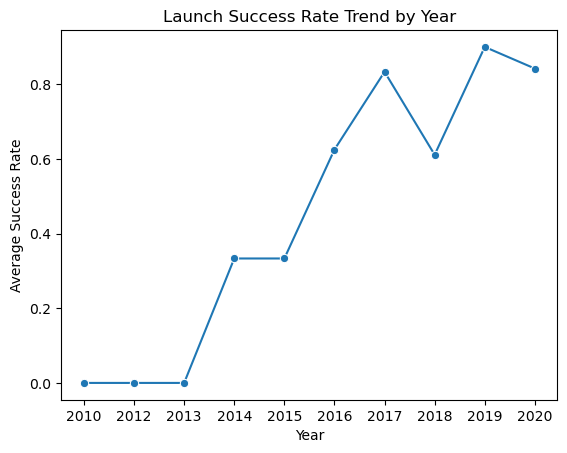

In [12]:
# Calculate the average success rate for each year
yearly_success_rate = df.groupby('Year')['Class'].mean().reset_index()

# Create the line plot
sns.lineplot(x='Year', y='Class', data=yearly_success_rate, marker='o')

# Set plot labels and title
plt.title('Launch Success Rate Trend by Year')
plt.xlabel('Year')
plt.ylabel('Average Success Rate')

# Show the plot
plt.show()

In [14]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [15]:
# Use get_dummies() to apply OneHotEncoder to the categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], drop_first=False)

# Display the first few rows of the resulting dataframe
print(features_one_hot.head())

   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0             1  6104.959412        1     False   False  False    1.0   
1             2   525.000000        1     False   False  False    1.0   
2             3   677.000000        1     False   False  False    1.0   
3             4   500.000000        1     False   False  False    1.0   
4             5  3170.000000        1     False   False  False    1.0   

   ReusedCount  Orbit_ES-L1  Orbit_GEO  ...  Serial_B1048  Serial_B1049  \
0            0        False      False  ...         False         False   
1            0        False      False  ...         False         False   
2            0        False      False  ...         False         False   
3            0        False      False  ...         False         False   
4            0        False      False  ...         False         False   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  \
0         False         False      

In [16]:
# Cast all columns in features_one_hot to float64
features_one_hot = features_one_hot.astype('float64')

# Display the first few rows to confirm the change
print(features_one_hot.head())

   FlightNumber  PayloadMass  Flights  GridFins  Reused  Legs  Block  \
0           1.0  6104.959412      1.0       0.0     0.0   0.0    1.0   
1           2.0   525.000000      1.0       0.0     0.0   0.0    1.0   
2           3.0   677.000000      1.0       0.0     0.0   0.0    1.0   
3           4.0   500.000000      1.0       0.0     0.0   0.0    1.0   
4           5.0  3170.000000      1.0       0.0     0.0   0.0    1.0   

   ReusedCount  Orbit_ES-L1  Orbit_GEO  ...  Serial_B1048  Serial_B1049  \
0          0.0          0.0        0.0  ...           0.0           0.0   
1          0.0          0.0        0.0  ...           0.0           0.0   
2          0.0          0.0        0.0  ...           0.0           0.0   
3          0.0          0.0        0.0  ...           0.0           0.0   
4          0.0          0.0        0.0  ...           0.0           0.0   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  \
0           0.0           0.0           0

In [17]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)